# EDA 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Se importan las siguientes bibliotecas:

* pandas: Para manipulación y análisis de datos.
* matplotlib.pyplot y seaborn: Para visualización de datos.
* numpy: Para operaciones numéricas.
* MinMaxScaler: Herramienta de sklearn para escalar características.


In [5]:
data_path = 'data/heart_attack_prediction_dataset.csv'  
data = pd.read_csv(data_path)

In [3]:
# 1. Comprensión del Dataset
# Mostrar las primeras 5 filas del DataFrame
print(data.head())

# Mostrar información básica del DataFrame
print(data.info())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

* Aqui se muestran las primeras 5 filas del DataFrame para tener una vista previa de los datos.

* También se muestra información el tipo de datos de cada columna y la cantidad de valores no nulos.

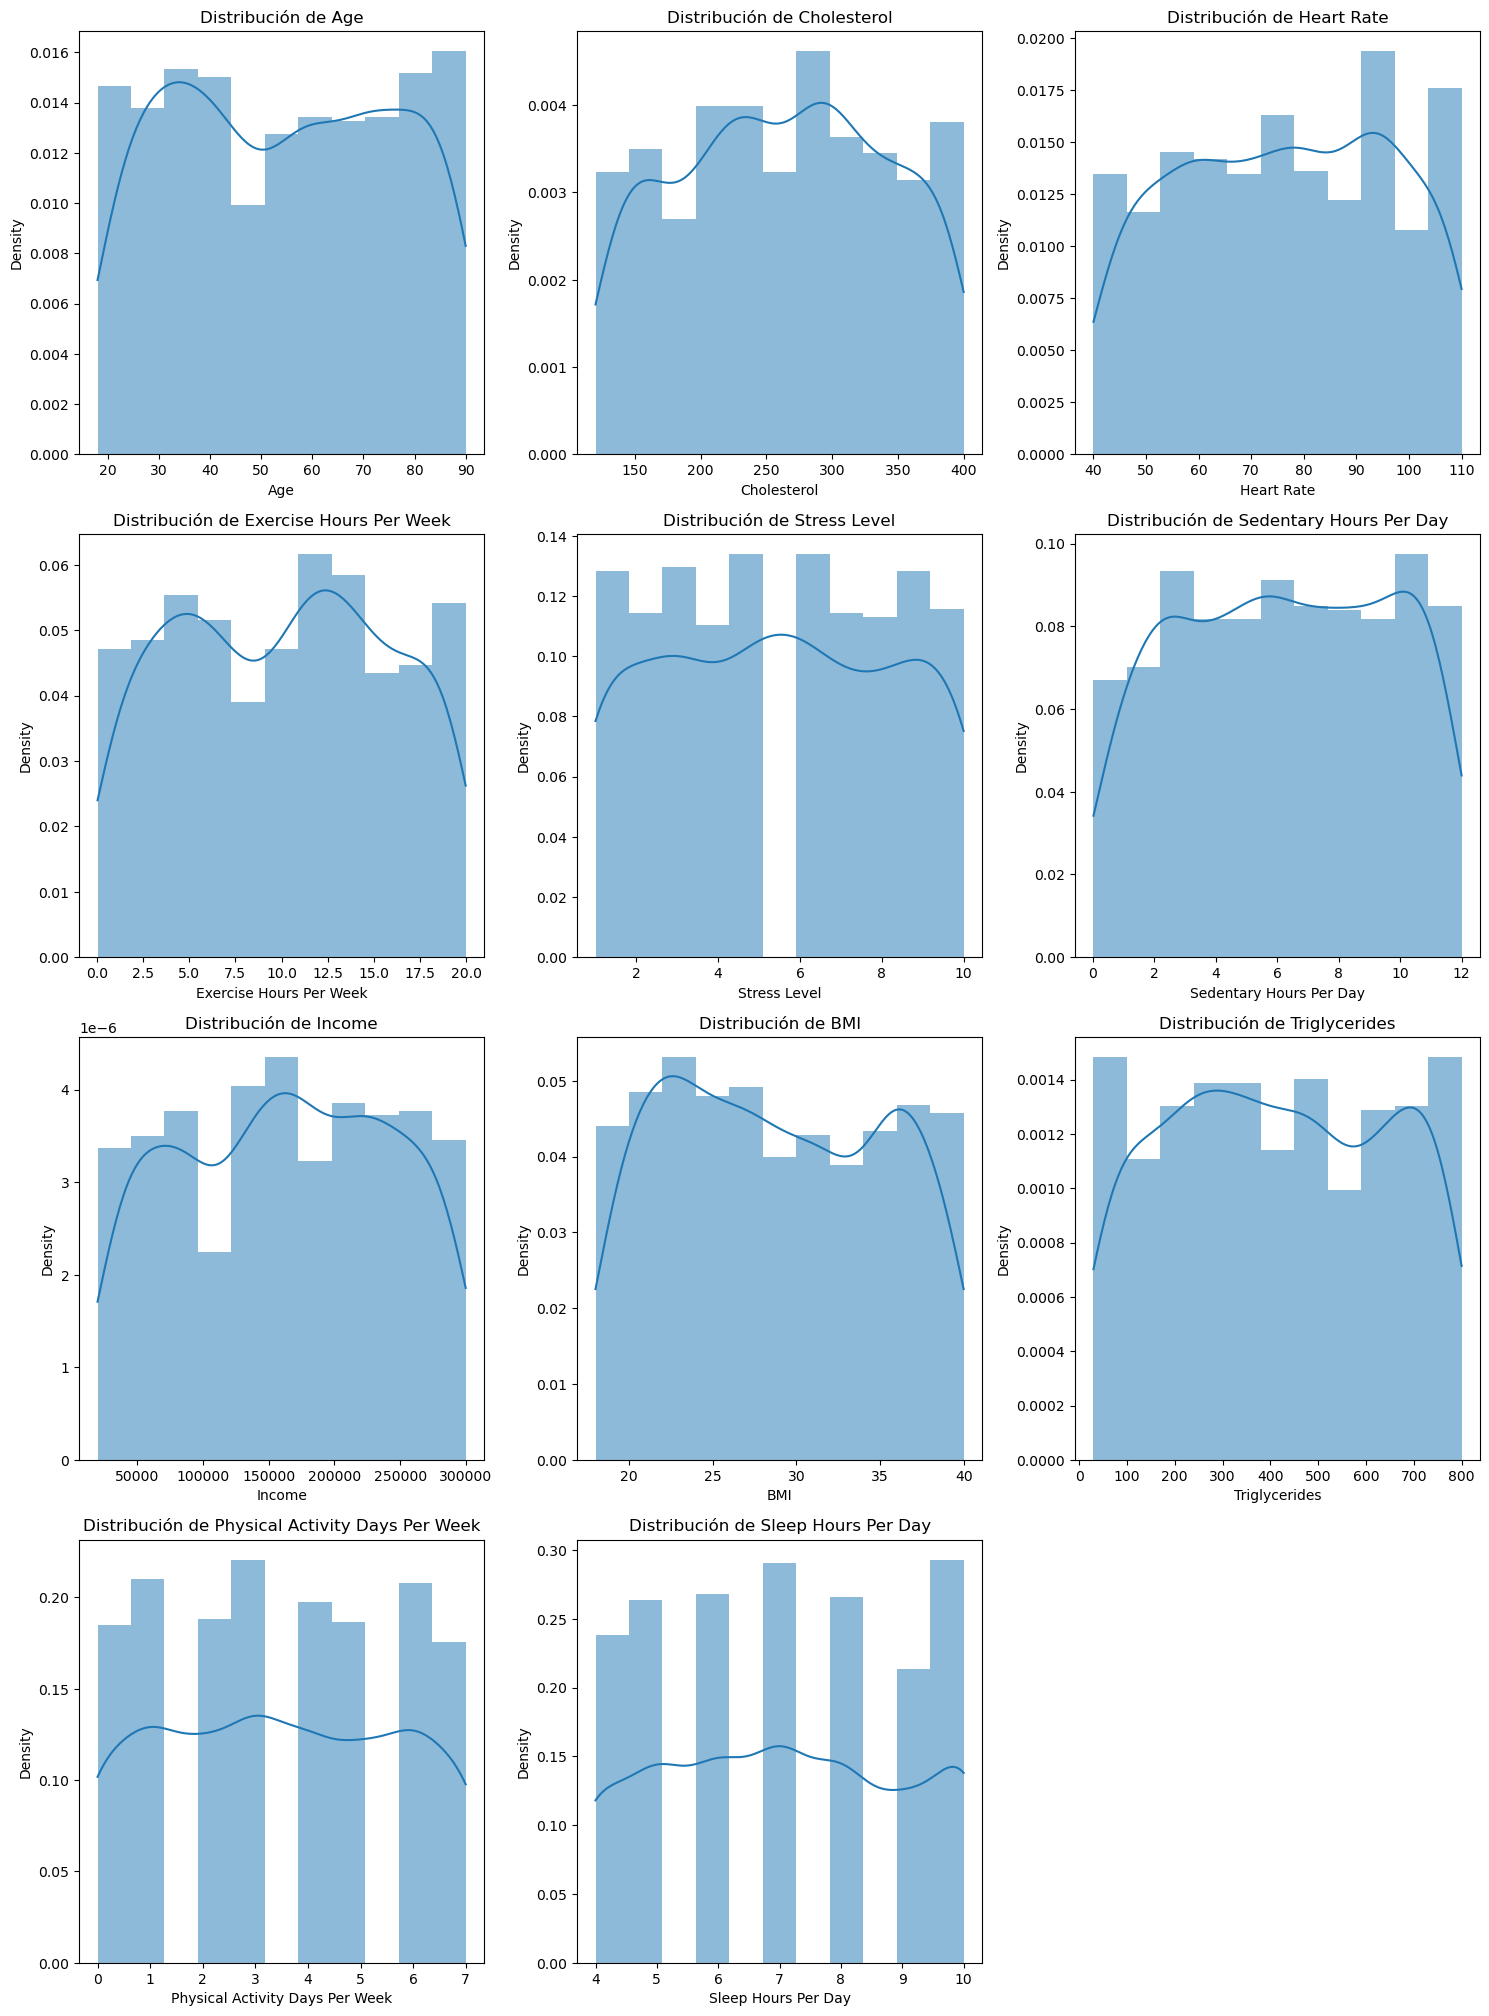

In [8]:
# 2. Visualización
# Histogramas para cada característica
# Seleccionar las columnas numéricas
columnas_numericas = data.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para acomodar todos los gráficos
num_filas = (len(columnas_numericas.columns) + 1) // 2
num_columnas = 3

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 50))

#Quito las columnas que no me interesan o son booleanas
columas_no_desaedas = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']
data_sin_bool = columnas_numericas.drop(columas_no_desaedas,axis='columns')

# Iterar a través de las columnas numéricas y crear un gráfico de distribución para cada una en una muestra aleatoria del 10% de los datos
for i, columna in enumerate(data_sin_bool.columns):
    #saco de data[column] el 10% de los datos de forma aleatoria
    data[columna] = data[columna].sample(frac=0.1, random_state=1)
    plt.subplot(num_filas, num_columnas, i + 1)
    sns.histplot(data[columna], kde=True, stat='density', linewidth=0)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)

# Ajustar el diseño
plt.tight_layout()
plt.show()

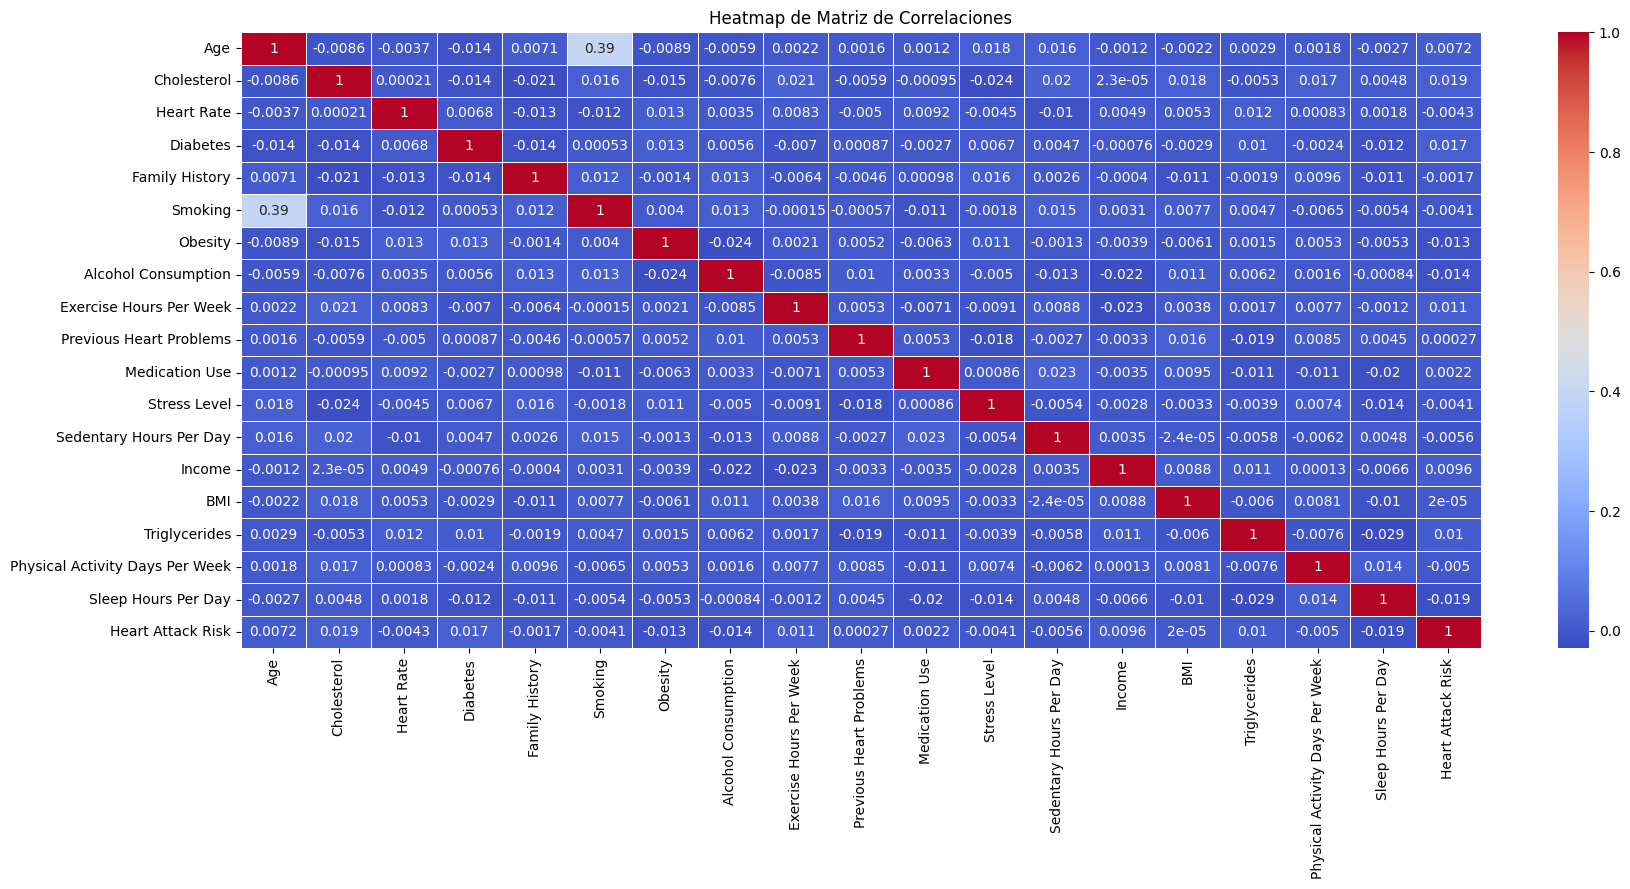

In [36]:
# 3. Matriz de Correlación
# Seleccionar las columnas numéricas para calcular la correlación
columnas_numericas = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()


# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(20, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Matriz de Correlaciones')
plt.show()

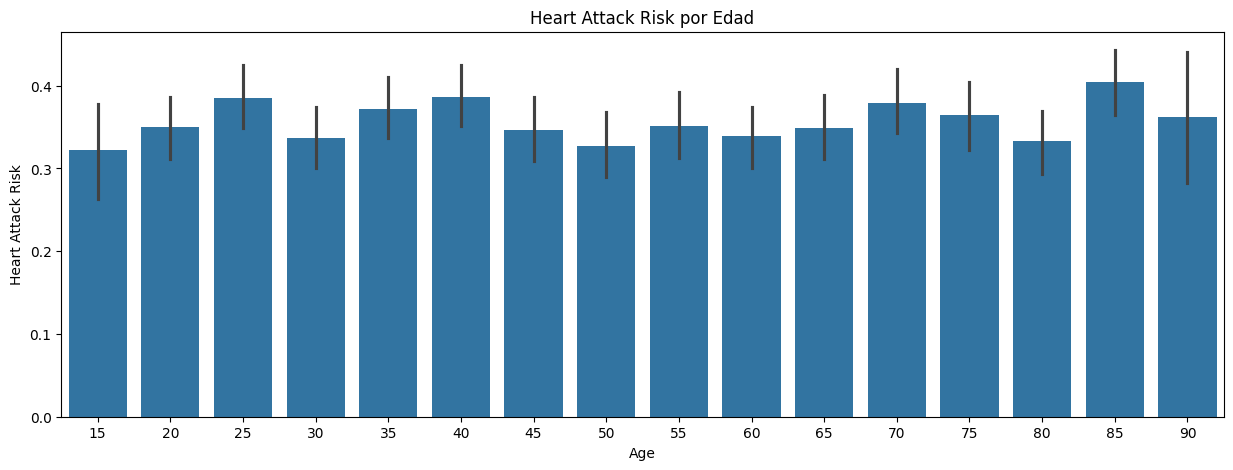

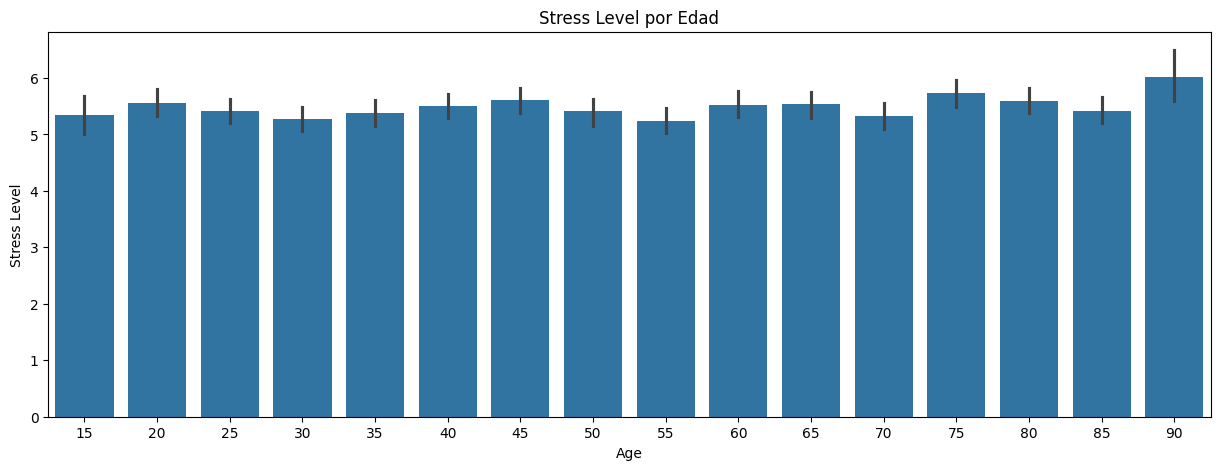

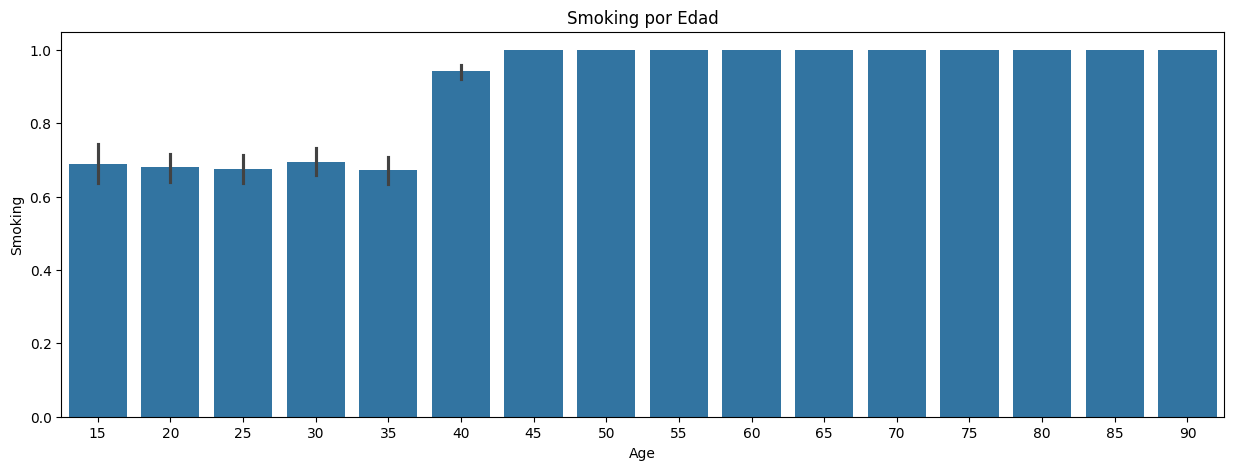

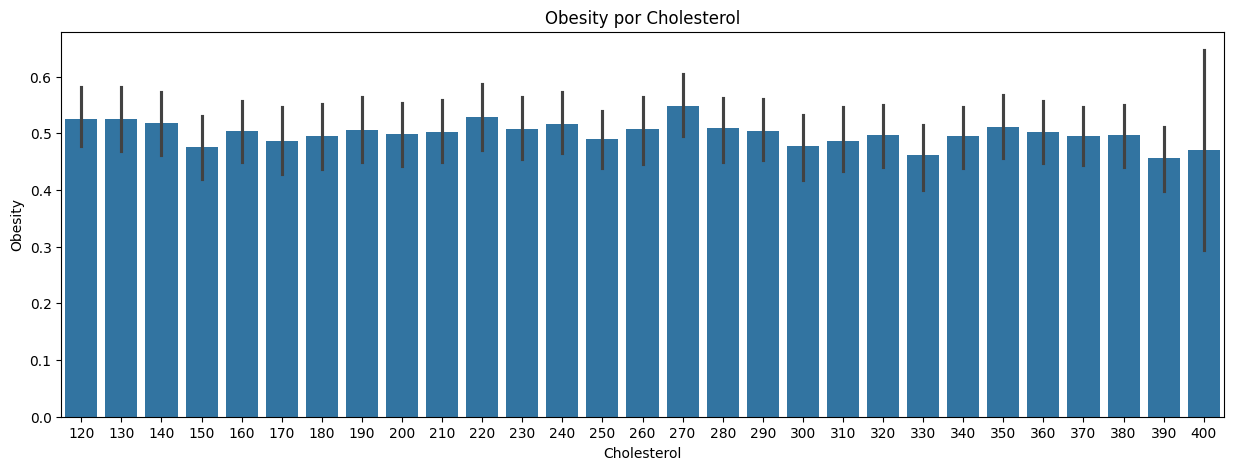

In [21]:
#edito el dataframe usando la edad cada 5 años para agrupar los datos
data['Age'] = data['Age'].apply(lambda x: x - x % 5)



#correlacion entre Age y Heart Attack Risk con barplot en un rango de 5 años
plt.figure(figsize=(15, 5))
sns.barplot(x='Age', y='Heart Attack Risk', data=data)
plt.title('Heart Attack Risk por Edad')
plt.show()


#correlacion entre Age y Stress Level con barplot en un rango de 5 años
plt.figure(figsize=(15, 5))
sns.barplot(x='Age', y='Stress Level', data=data)
plt.title('Stress Level por Edad')
plt.show()


#correlacion entre Age y Smoking con barplot en un rango de 5 años
plt.figure(figsize=(15, 5))
sns.barplot(x='Age', y='Smoking', data=data)
plt.title('Smoking por Edad')
plt.show()

#edito el dataframe usando el Cholesterol 
data['Cholesterol'] = data['Cholesterol'].apply(lambda x: x - x % 10)

#correlacion entre Cholesterol y Obesity con barplot
plt.figure(figsize=(15, 5))
sns.barplot(x='Cholesterol', y='Obesity', data=data)
plt.title('Obesity por Cholesterol')
plt.show()

Correlaciones positivas:

* La variable "Smoking" tiene una correlación positiva relativamente fuerte con la variable "Age" (0.394891). Esto significa que a medida que aumenta la edad, es más probable que la persona sea fumadora.
* La variable "Triglycerides" tiene una correlación positiva moderada con la variable "Cholesterol" (0.017292). Esto sugiere que las personas con niveles más altos de colesterol también tienden a tener niveles más altos de triglicéridos.

Correlaciones negativas:

* La variable "Diabetes" tiene una correlación negativa con la variable "Age" (-0.014105). Esto indica que a medida que aumenta la edad, es menos probable que la persona tenga diabetes.
* La variable "Obesity" tiene una correlación negativa con la variable "Cholesterol" (-0.014843). Esto sugiere que las personas con niveles más altos de colesterol tienden a tener menos probabilidades de ser obesas.

Correlaciones cercanas a cero:

* La variable "Heart Rate" tiene correlaciones cercanas a cero con la mayoría de las otras variables en el conjunto de datos. Esto indica que no hay una relación lineal fuerte entre la frecuencia cardíaca y las demás variables.

Correlaciones con la variable objetivo ("Heart Attack Risk"):

* La variable "Cholesterol" (0.019340) y "Diabetes" (0.017225) tienen correlaciones positivas relativamente fuertes con la variable "Heart Attack Risk", lo que sugiere que niveles más altos de colesterol y la presencia de diabetes pueden aumentar el riesgo de un ataque al corazón.
* La variable "Alcohol Consumption" (-0.013778) y "Obesity" (-0.013318) tienen correlaciones negativas moderadas con la variable "Heart Attack Risk", lo que indica que el consumo de alcohol y la obesidad pueden estar relacionados con un menor riesgo de ataque al corazón.

In [37]:
print(data.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


# Cleaning 

In [6]:
#reviso si las columnas tienen valores nulos
missing_values = data.isnull().sum()
print(missing_values)

#Eliminar filas con valores faltantes
data_cleaned = data.dropna()



Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [7]:
#Seleccionar solo las columnas numéricas del DataFrame
data_numeric = data.select_dtypes(include=[np.number])

print(data_numeric.columns)
datos = data_numeric

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')


# Modelado

## Algoritmos Supervisados

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



# Separar las características (X) de la variable objetivo (y)
X = datos.drop('Heart Attack Risk', axis=1)
y = datos['Heart Attack Risk']

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


### Regresión Logística

In [117]:

# Entrenar y predecir con Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluar Regresión Logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)




# Imprimir las métricas y la matriz de confusión
print("Regresión Logística:")
print("Puntuación de entrenamiento:", logistic_model.score(X_train, y_train))
print("Puntuación de prueba:", accuracy_logistic)
print("Informe de clasificación:\n", report_logistic)
print("Matriz de Confusión:\n", confusion_matrix_logistic)

Regresión Logística:
Puntuación de entrenamiento: 0.5084463214047567
Puntuación de prueba: 0.5013333333333333
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38      1120
           1       0.50      0.69      0.58      1130

    accuracy                           0.50      2250
   macro avg       0.50      0.50      0.48      2250
weighted avg       0.50      0.50      0.48      2250

Matriz de Confusión:
 [[344 776]
 [346 784]]


#### Hiper Parametros

In [118]:
print("puntuacion de entrenamiento: {:.3f}".format(logistic_model.score(X_train, y_train)))
print("puntuacion de test: {:.3f}".format(logistic_model.score(X_test, y_test)))

puntuacion de entrenamiento: 0.508
puntuacion de test: 0.501


In [98]:
# probamos C=0.001
logistic_model1 = LogisticRegression(C=0.001).fit(X_train, y_train)

print("puntuacion de entrenamiento: {:.3f}".format(logistic_model1.score(X_train, y_train)))
print("puntuacion de test: {:.3f}".format(logistic_model1.score(X_test, y_test)))


puntuacion de entrenamiento: 0.508
puntuacion de test: 0.501


In [99]:
# probamos C=100
logistic_model2 = LogisticRegression(C=100).fit(X_train, y_train)

print("puntuacion de entrenamiento: {:.3f}".format(logistic_model2.score(X_train, y_train)))
print("puntuacion de test: {:.3f}".format(logistic_model2.score(X_test, y_test)))

puntuacion de entrenamiento: 0.508
puntuacion de test: 0.501


### Conclusiones

Regresión Logística:

* Exactitud (Accuracy): 0.5013
* Precisión: El modelo tiene una precisión similar para ambas clases (0 y 1).
* Recall: El modelo tiene un recall más alto para la clase 1 que para la clase 0.
* F1-Score: El puntaje F1 es más alto para la clase 1 que para la clase 0.
* Matriz de Confusión: El modelo predice más falsos negativos (FN) que falsos positivos (FP).

### Árbol de Decisión

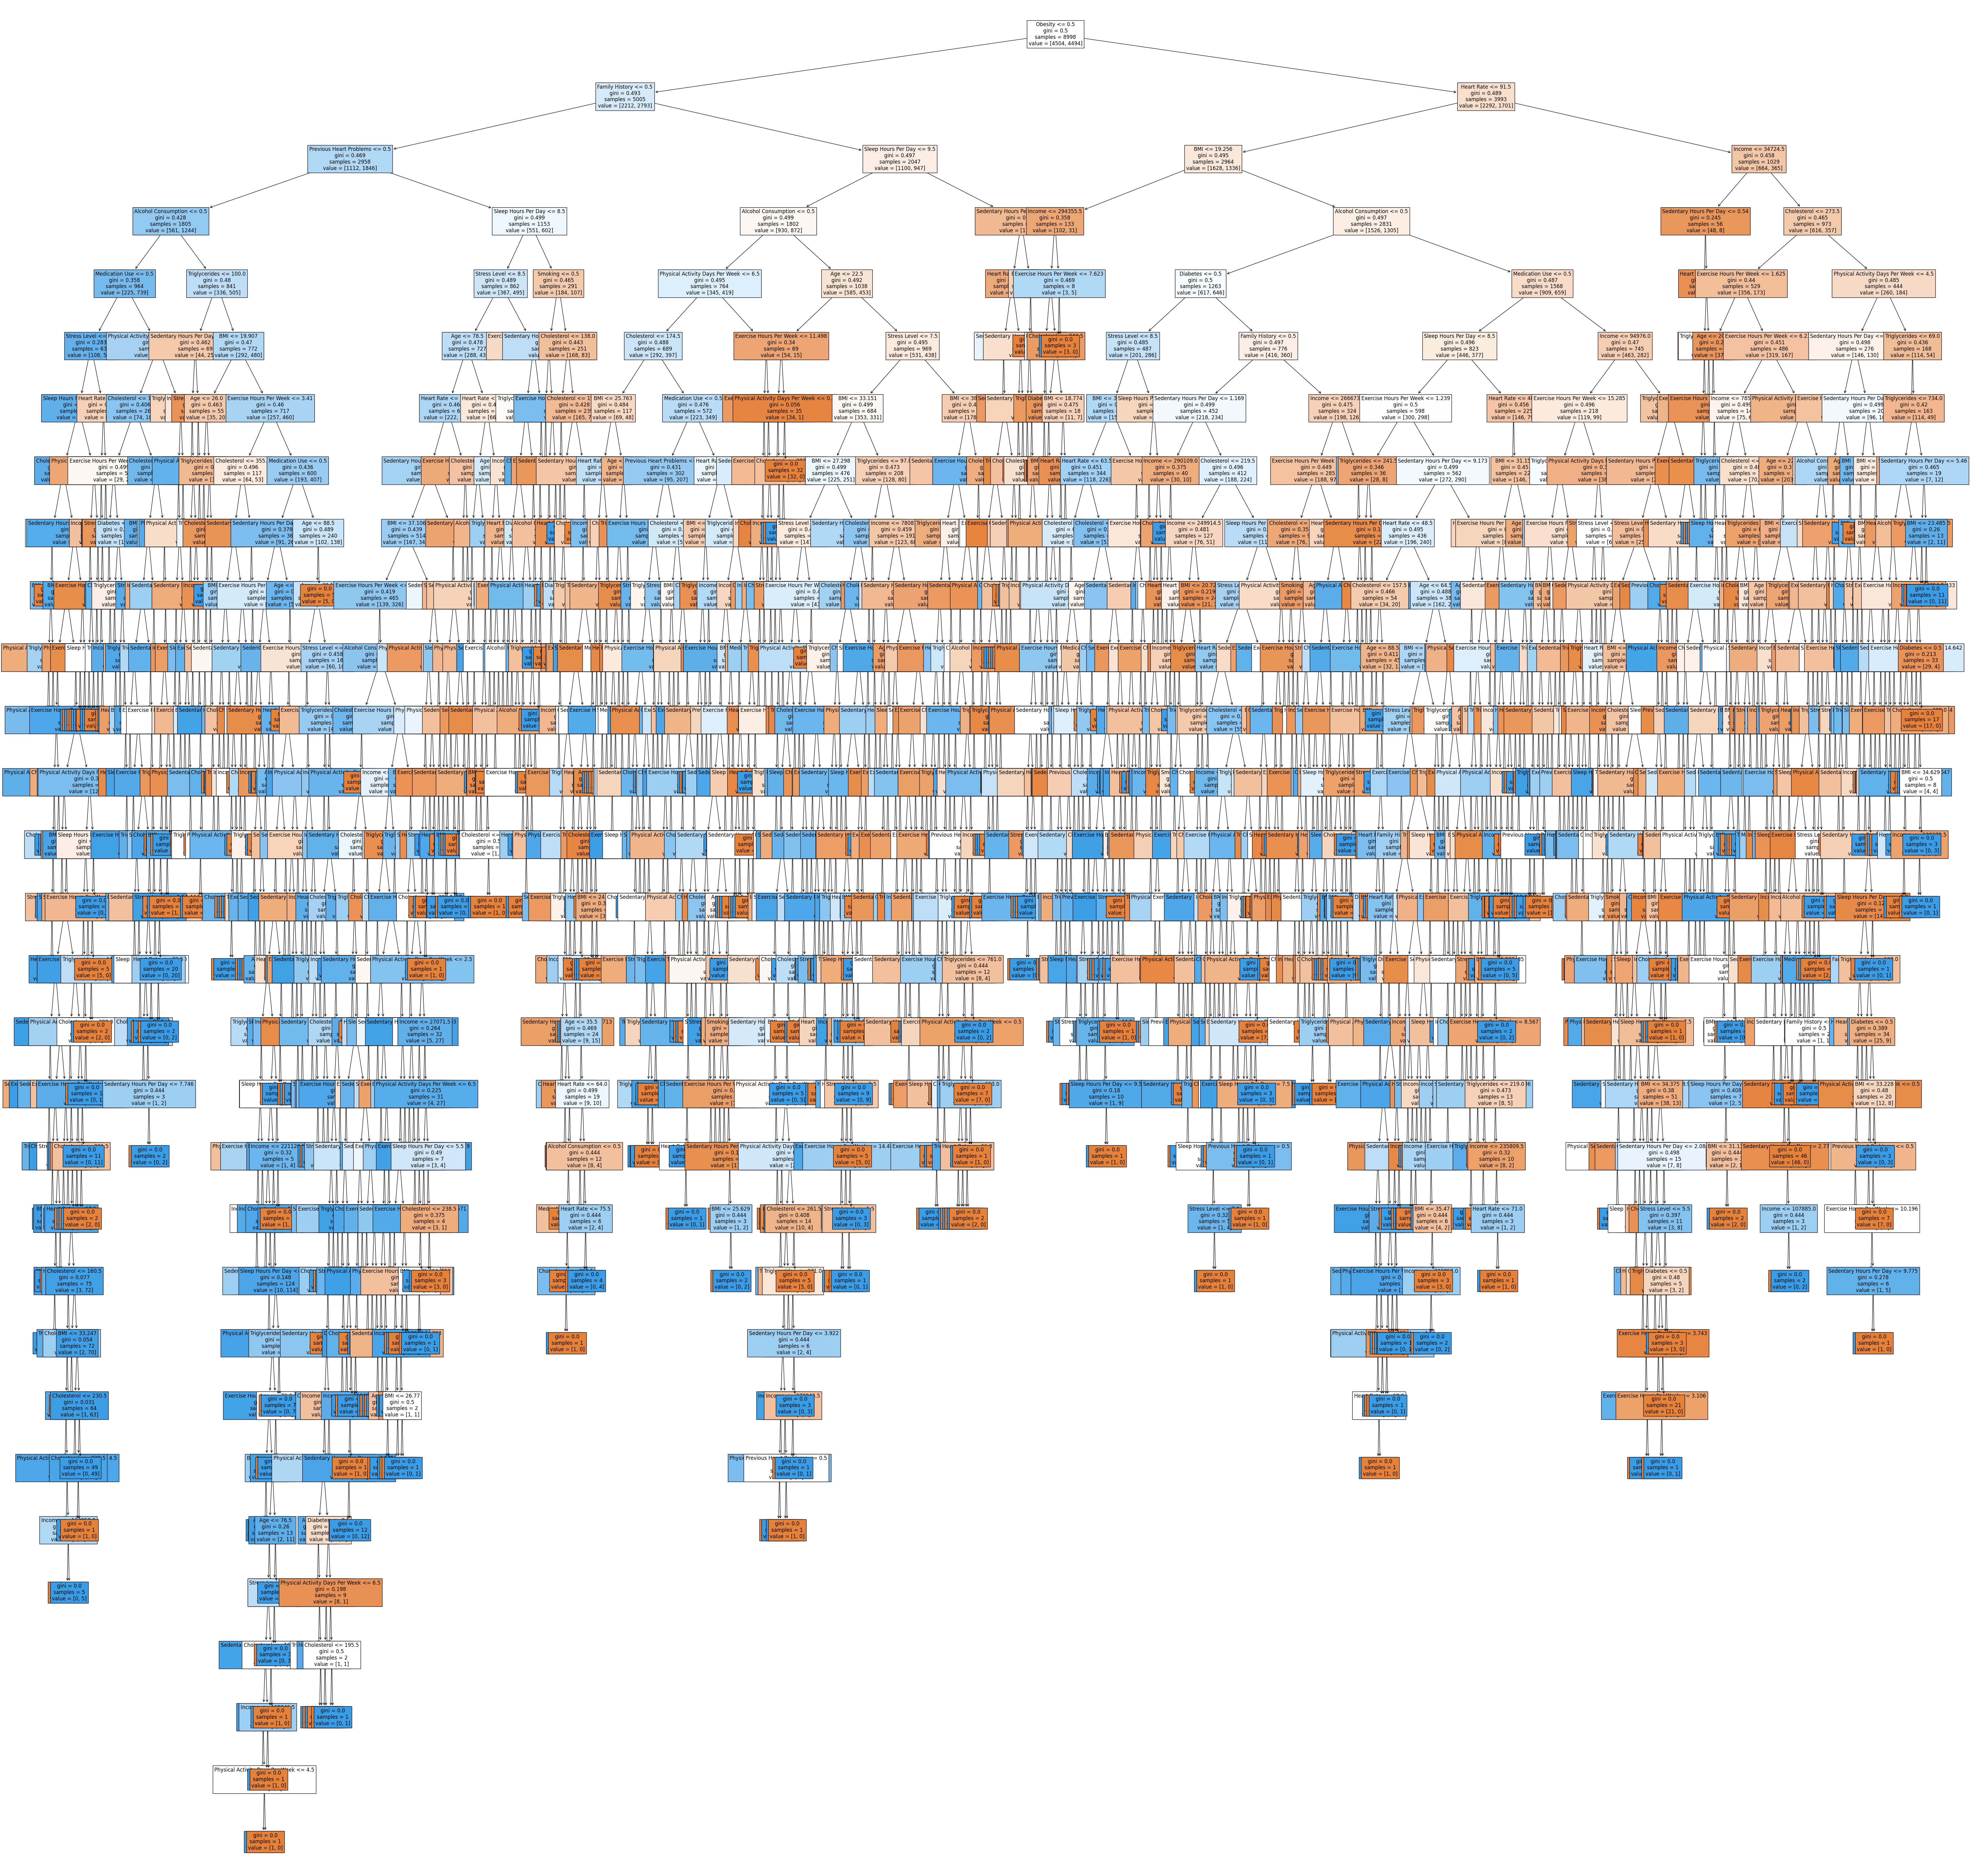

In [10]:

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

plt.figure(figsize =(80,80))
plot_tree(decision_tree_model, filled=True, fontsize=12, feature_names=X.columns)
plt.show()

un árbol grande puede capturar relaciones más complejas en los datos, también corre el riesgo de sobreajuste y puede perder interpretabilidad. Es crucial equilibrar la complejidad del modelo con su capacidad para generalizar a nuevos datos.

#### Hiper Parametros

In [11]:
# Entrenar y predecir con Árbol de Decisión
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluar Árbol de Decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Imprimir las métricas y la matriz de confusión
print("\nÁrbol de Decisión:")
print("puntuacion de entrenamiento: ", decision_tree_model.score(X_train, y_train))
print("puntuacion de test: ", decision_tree_model.score(X_test, y_test))
print("Informe de clasificación:\n", report_tree)
print("Matriz de Confusión:\n", confusion_matrix_tree)


Árbol de Decisión:
puntuacion de entrenamiento:  1.0
puntuacion de test:  0.5746666666666667
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58      1120
           1       0.58      0.57      0.57      1130

    accuracy                           0.57      2250
   macro avg       0.57      0.57      0.57      2250
weighted avg       0.57      0.57      0.57      2250

Matriz de Confusión:
 [[649 471]
 [486 644]]


In [12]:
decision_tree_model = DecisionTreeClassifier(max_depth=5)
decision_tree_model.fit(X_train, y_train)

print("puntuacion de entrenamiento: ", decision_tree_model.score(X_train, y_train))
print("puntuacion de test: ", decision_tree_model.score(X_test, y_test))

puntuacion de entrenamiento:  0.6183596354745499
puntuacion de test:  0.5928888888888889


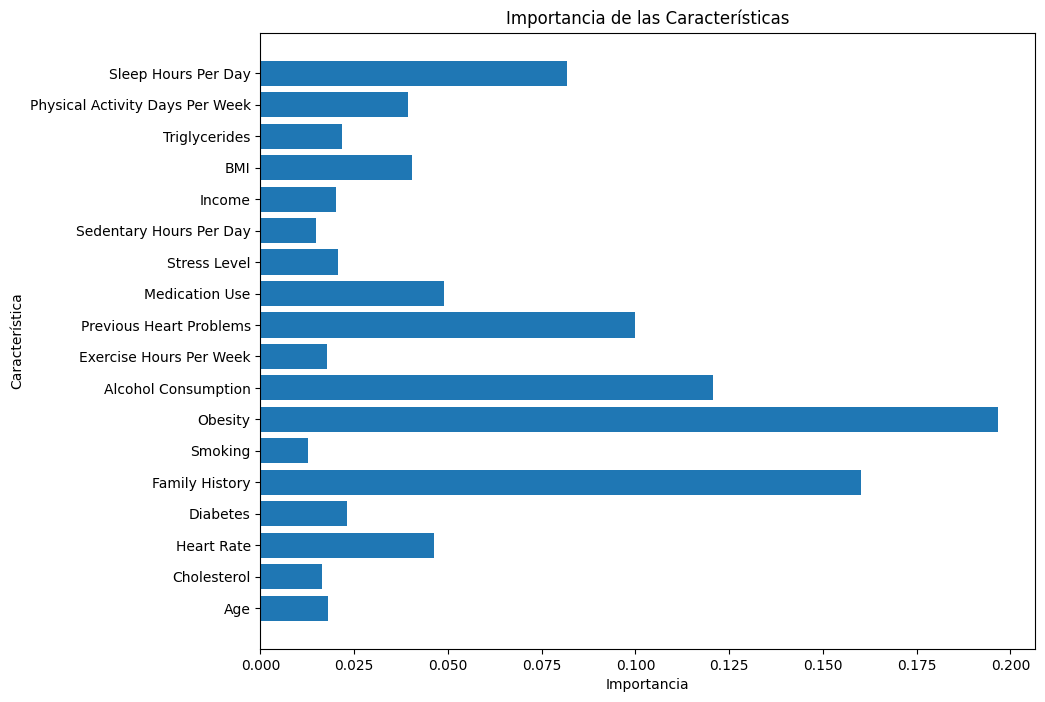

In [15]:
#print("Feature importances:\n{}".format(decision_tree_model.feature_importances_))

# Crear un gráfico de barras que muestre la importancia de las características
plt.figure(figsize=(10, 8))
plt.barh(X.columns, decision_tree_model.feature_importances_)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

* Triglycerides (0.1087)

 Esta es la característica más importante según el modelo. Los niveles de triglicéridos en la sangre son un factor importante en la salud del corazón.

* BMI (0.1050)

 Es el segundo factor más importante, lo que tiene sentido ya que el BMI se relaciona con la obesidad y, por lo tanto, con el riesgo de enfermedades cardíacas.

* Sedentary Hours Per Day (0.0984)

 Las horas sedentarias pueden indicar un estilo de vida poco activo, lo que aumenta el riesgo de enfermedades cardíacas.

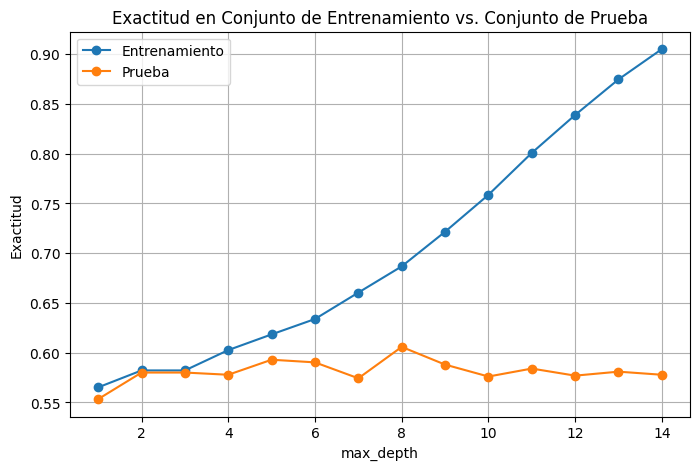

In [19]:
max_depth_values = range(1, 15)

# Crea listas vacías para almacenar las exactitudes del entrenamiento y prueba
train_accuracies = []
test_accuracies = []

# Itera a través de los valores de max_depth
for max_depth in max_depth_values:
    # Crea un nuevo modelo de Árbol de Decisión con el valor de max_depth actual
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Entrena el modelo en los datos de entrenamiento
    decision_tree.fit(X_train, y_train)
    
    # Realiza predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = decision_tree.predict(X_train)
    y_test_pred = decision_tree.predict(X_test)
    
    # Calcula la exactitud en los conjuntos de entrenamiento y prueba
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Agrega las exactitudes a las listas
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Crea un gráfico que muestra las exactitudes en función de max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, train_accuracies, marker='o', label='Entrenamiento')
plt.plot(max_depth_values, test_accuracies, marker='o', label='Prueba')
plt.title('Exactitud en Conjunto de Entrenamiento vs. Conjunto de Prueba')
plt.xlabel('max_depth')
plt.ylabel('Exactitud')
plt.legend()
plt.grid(True)
plt.show()

### Conclusiones de Hiper Parametros
A medida que la profundidad máxima (max_depth) aumenta en el rango de 1 a 15, tanto la exactitud en el conjunto de entrenamiento como la exactitud en el conjunto de prueba muestran una tendencia general al aumento inicial.

Para profundidades bajas (alrededor de 1 a 4), el modelo tiene un rendimiento similar en ambos conjuntos, con una exactitud de alrededor del 58% en el conjunto de prueba. Esto sugiere que el modelo no está sobreajustando y es relativamente simple.

A partir de una profundidad máxima de aproximadamente 5, se observa una brecha entre la exactitud en el conjunto de entrenamiento y la exactitud en el conjunto de prueba. La exactitud en el conjunto de entrenamiento sigue aumentando, mientras que la exactitud en el conjunto de prueba se estabiliza o disminuye ligeramente. Esto es un indicio de que el modelo comienza a sobreajustar a los datos de entrenamiento a medida que se vuelve más complejo.

La brecha entre la exactitud en el conjunto de entrenamiento y prueba es más evidente a medida que la profundidad máxima aumenta. El modelo se vuelve más capaz de ajustarse a los datos de entrenamiento, pero su capacidad de generalización en datos no vistos disminuye.

A partir de una profundidad máxima de alrededor de 9, la exactitud en el conjunto de entrenamiento alcanza su punto máximo, mientras que la exactitud en el conjunto de prueba comienza a disminuir, lo que indica un claro caso de sobreajuste.

Por lo tanto, la elección óptima para la profundidad máxima podría estar en el rango de 5 a 9, donde el modelo no es demasiado simple ni demasiado complejo. La exactitud en el conjunto de prueba es relativamente alta en este rango.

### Máquinas de Soporte Vectorial 

In [21]:
# Entrenar y predecir con SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluar SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)



# Imprimir las métricas y la matriz de confusión
print("\nMáquinas de Soporte Vectorial (SVM):")
print("puntuacion de entrenamiento: ", svm_model.score(X_train, y_train))
print("puntuacion de test: ", svm_model.score(X_test, y_test))
print("Informe de clasificación:\n", report_svm)
print("Matriz de Confusión:\n", confusion_matrix_svm)


Máquinas de Soporte Vectorial (SVM):
puntuacion de entrenamiento:  0.5055567903978662
puntuacion de test:  0.492
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50      1120
           1       0.49      0.48      0.49      1130

    accuracy                           0.49      2250
   macro avg       0.49      0.49      0.49      2250
weighted avg       0.49      0.49      0.49      2250

Matriz de Confusión:
 [[567 553]
 [590 540]]


Máquinas de Soporte Vectorial (SVM):

* Exactitud (Accuracy): 0.492
* Precisión: El modelo tiene una precisión similar para ambas clases (0 y 1).
* Recall: El modelo tiene un recall similar para ambas clases.
* F1-Score: El puntaje F1 es similar para ambas clases.
* Matriz de Confusión: El modelo tiene un equilibrio entre FP y FN.

## Algoritmo No Supervisado

In [101]:
from sklearn.neighbors import KNeighborsClassifier

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Algoritmo: K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos (n_neighbors) según tus necesidades
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluar K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("puntuacion de entrenamiento: ", knn_model.score(X_train, y_train))
print("puntuacion de test: ", knn_model.score(X_test, y_test))

# Imprimir las métricas y la matriz de confusión
print("\nK-Nearest Neighbors:")
print("Exactitud:", accuracy_knn)
print("Informe de clasificación:\n", report_knn)
print("Matriz de Confusión:\n", confusion_matrix_knn)


puntuacion de entrenamiento:  0.7182596291012838
puntuacion de test:  0.5664575014261266

K-Nearest Neighbors:
Exactitud: 0.5664575014261266
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.64      0.74      0.69      1125
           1       0.35      0.26      0.30       628

    accuracy                           0.57      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.57      0.55      1753

Matriz de Confusión:
 [[832 293]
 [467 161]]


K-Nearest Neighbors:

* Exactitud: 57.22%
* La precisión es alta para la clase 0, pero baja para la clase 1.
* La recuperación (recall) es más alta para la clase 0 y más baja para la clase 1.
* El puntaje F1 es más alto para la clase 0.
* La matriz de confusión muestra una cantidad significativa de falsos negativos para la clase 1.

## Análisis General:

* Ninguno de los modelos muestra un rendimiento excepcional. La exactitud oscila alrededor del 50-57%, lo que sugiere que los modelos no son muy efectivos para clasificar los datos.

* Los modelos muestran dificultades para equilibrar la precisión y la recuperación para ambas clases. En algunos casos, se logra un equilibrio, pero en otros, uno de los dos indicadores es mejor que el otro.

* Los modelos también tienen dificultades para reducir los falsos positivos y falsos negativos en la matriz de confusión.

Es importante tener en cuenta que los resultados pueden depender de cómo se realizaron las técnicas de preprocesamiento y el ajuste de hiperparámetros. Para mejorar el rendimiento, podrías considerar:

* Ajustar los hiperparámetros de los modelos, como cambiar los valores de los parámetros de regularización en la Regresión Logística, la profundidad del árbol en el Árbol de Decisión y el valor de K en K-Nearest Neighbors.

* Experimentar con otras técnicas de preprocesamiento, como normalización, selección de características y exploración de nuevas características.

* Probar diferentes algoritmos de clasificación o ensamblar varios modelos para mejorar el rendimiento.